In [29]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas_datareader import data
import yfinance as yf

In [30]:
# Defino el período de tiempo para todas las cargas
start_date = "2000-01-01"
end_date = "2023-03-28"

In [31]:
# Descarga de la información histórica (del 2000 a la fecha actual) del índice.
sp500 = yf.download('^GSPC', start=start_date, end=end_date, rounding=True, group_by='Date')
sp500

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.25,1478.00,1438.36,1455.22,1455.22,931800000
2000-01-04,1455.22,1455.22,1397.43,1399.42,1399.42,1009000000
2000-01-05,1399.42,1413.27,1377.68,1402.11,1402.11,1085500000
2000-01-06,1402.11,1411.90,1392.10,1403.45,1403.45,1092300000
2000-01-07,1403.45,1441.47,1400.73,1441.47,1441.47,1225200000
...,...,...,...,...,...,...
2023-03-21,3975.89,4009.08,3971.19,4002.87,4002.87,4920240000
2023-03-22,4002.04,4039.49,3936.17,3936.97,3936.97,4533010000
2023-03-23,3959.21,4007.66,3919.05,3948.72,3948.72,4991600000


In [32]:
# Resuelvo el problema del "Date" como indice
sp500.reset_index(inplace=True)
sp500

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.25,1478.00,1438.36,1455.22,1455.22,931800000
1,2000-01-04,1455.22,1455.22,1397.43,1399.42,1399.42,1009000000
2,2000-01-05,1399.42,1413.27,1377.68,1402.11,1402.11,1085500000
3,2000-01-06,1402.11,1411.90,1392.10,1403.45,1403.45,1092300000
4,2000-01-07,1403.45,1441.47,1400.73,1441.47,1441.47,1225200000
...,...,...,...,...,...,...,...
5840,2023-03-21,3975.89,4009.08,3971.19,4002.87,4002.87,4920240000
5841,2023-03-22,4002.04,4039.49,3936.17,3936.97,3936.97,4533010000
5842,2023-03-23,3959.21,4007.66,3919.05,3948.72,3948.72,4991600000
5843,2023-03-24,3939.21,3972.74,3909.16,3970.99,3970.99,4583970000


In [33]:
# Selecciono las columnas para trabajar
sp500 = sp500.loc[:, ["Date", "Open", "Adj Close", "Volume"]]
sp500

,Date,Open,Adj Close,Volume
0,2000-01-03,1469.25,1455.22,931800000
1,2000-01-04,1455.22,1399.42,1009000000
2,2000-01-05,1399.42,1402.11,1085500000
3,2000-01-06,1402.11,1403.45,1092300000
4,2000-01-07,1403.45,1441.47,1225200000
...,...,...,...,...
5840,2023-03-21,3975.89,4002.87,4920240000
5841,2023-03-22,4002.04,3936.97,4533010000
5842,2023-03-23,3959.21,3948.72,4991600000
5843,2023-03-24,3939.21,3970.99,4583970000


In [34]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5845 entries, 0 to 5844
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5845 non-null   datetime64[ns]
 1   Open       5845 non-null   float64       
 2   Adj Close  5845 non-null   float64       
 3   Volume     5845 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 182.8 KB


In [35]:
# Revisión de registros duplicados
print('Los duplicados son:', sp500.duplicated().sum())

Los duplicados son: 0


In [36]:
# Resumen de estadísticas descriptivas del dataset
summary = sp500.describe()
summary

,Open,Adj Close,Volume
count,5845.000000,5845.000000,5.845000e+03
mean,1894.649090,1894.859612,3.309013e+09
std,983.453175,983.568547,1.525307e+09
min,679.280000,676.530000,3.560700e+08
25%,1185.370000,1185.560000,1.992560e+09
50%,1437.490000,1437.770000,3.416190e+09
75%,2413.520000,2411.800000,4.165320e+09
max,4804.510000,4796.560000,1.145623e+10


In [37]:
# Grabo la información del S&P500
sp500.to_csv(r'df_sp500.csv', index=False)

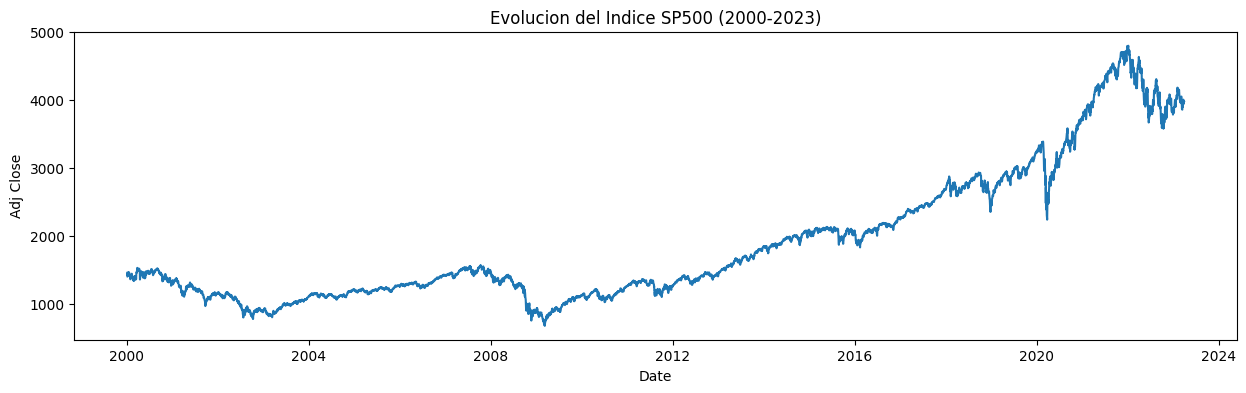

In [38]:
#gráfico de líneas
plt.figure(figsize=(15, 4))
plt.plot(sp500['Date'], sp500['Adj Close'])

#Establesco el título y las etiquetas de los ejes
plt.title('Evolucion del Indice SP500 (2000-2023)')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.show()

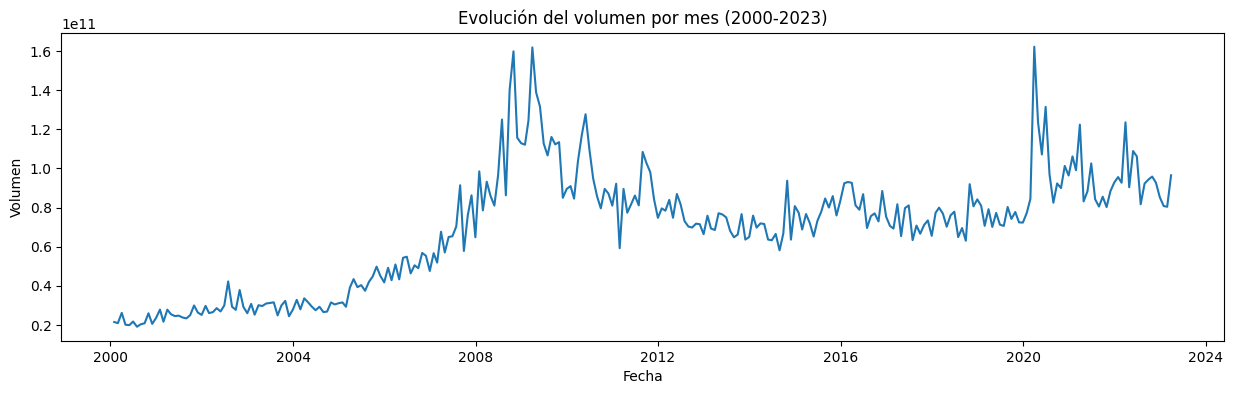

In [39]:
#Convertir la columna 'Date' a un objeto datetime
sp500['Date'] = pd.to_datetime(sp500['Date'])

#Agrupar los datos por mes y sumar el volumen
df_monthly = sp500.groupby(pd.Grouper(key='Date', freq='M')).agg({'Volume': 'sum'})

#gráfico de líneas
plt.figure(figsize=(15, 4))
plt.plot(df_monthly.index, df_monthly['Volume'])

#Establecer el título y las etiquetas de los ejes
plt.title('Evolución del volumen por mes (2000-2023)')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.show()

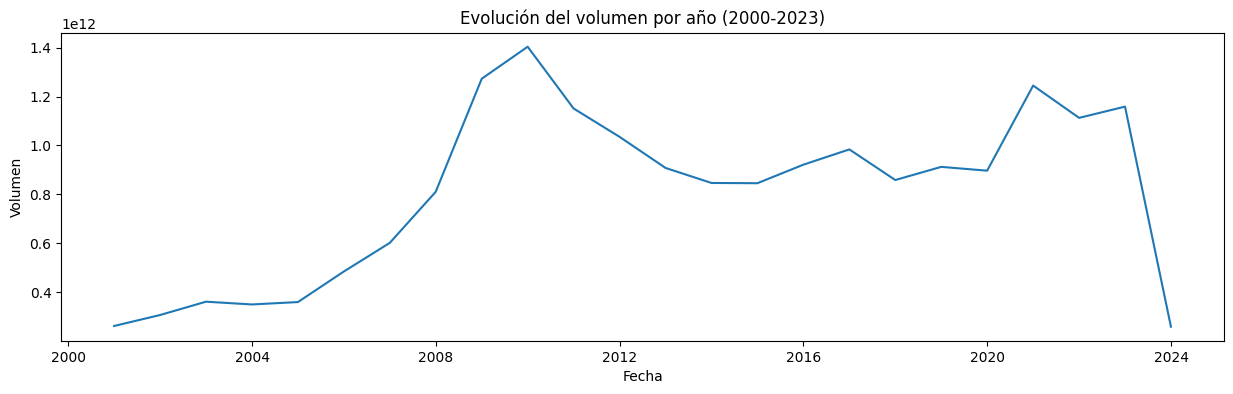

In [40]:
#Convertir la columna 'Date' a un objeto datetime
sp500['Date'] = pd.to_datetime(sp500['Date'])

#Agrupar los datos por año y sumar el volumen
df_yearly = sp500.groupby(pd.Grouper(key='Date', freq='Y')).agg({'Volume': 'sum'})

#gráfico de líneas
plt.figure(figsize=(15, 4))
plt.plot(df_yearly.index, df_yearly['Volume'])

#Establecer el título y las etiquetas de los ejes
plt.title('Evolución del volumen por año (2000-2023)')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.show()

In [63]:
# Selecciono los 11 indices del S&P500
indi= ['APA', 'AAPL', 'ACGL', 'ADM', 'AEE', 'ADP', 'AAP', 'ALB', 'AMT', 'A', 'GOOGL'] 

In [64]:
# Concateno los elementos separados por espacios para adaptar a los requerimientos de la libreria
indices = " ".join(indi)

In [65]:
df_indi = yf.download(indices, start = start_date, end = end_date, rounding=True)

[*********************100%***********************]  11 of 11 completed


In [66]:
df_indi

Adj Close                                                       \
                   A     AAP    AAPL   ACGL    ADM     ADP    AEE     ALB   
Date                                                                        
2000-01-03     44.00     NaN    0.85   1.28   6.59   25.35  11.03    6.24   
2000-01-04     40.64     NaN    0.78   1.27   6.52   25.35  11.03    6.24   
2000-01-05     38.12     NaN    0.79   1.39   6.42   25.10  11.45    6.34   
2000-01-06     36.67     NaN    0.72   1.38   6.45   25.44  11.41    6.56   
2000-01-07     39.72     NaN    0.76   1.45   6.55   26.02  11.58    6.45   
...              ...     ...     ...    ...    ...     ...    ...     ...   
2023-03-21    137.01  119.79  159.28  67.21  77.69  218.10  83.74  222.93   
2023-03-22    133.73  113.60  157.83  65.87  76.97  213.26  81.81  216.11   
2023-03-23    131.13  111.14  158.93  65.60  75.13  213.62  80.61  215.64   
2023-03-24    131.96  110.83  160.25  66.05  76.61  214.13  84.04  217.79   
2023-03-27    133.07  114.74  158.28  66.38  77.75  214.36  83.99  218.88   

                            ...     Volume                               \
               AMT   GOOGL  ...        AAP       AAPL     ACGL      ADM   
Date                        ...                                           
2000-01-03   23.72     NaN  ...        NaN  535796800   433800   984753   
2000-01-04   23.47     NaN  ...        NaN  512377600    84600  1088057   
2000-01-05   24.17     NaN  ...        NaN  778321600    80100  1087947   
2000-01-06   23.92     NaN  ...        NaN  767972800   348300   899971   
2000-01-07   25.24     NaN  ...        NaN  460734400   247500  1186290   
...            ...     ...  ...        ...        ...      ...      ...   
2023-03-21  198.19  104.92  ...  1290000.0   73938300  1635700  2506300   
2023-03-22  192.12  103.37  ...  2061100.0   75701800  2322200  2721600   
2023-03-23  191.62  105.60  ...  2062700.0   67622100  2018300  3030900   
2023-03-24  199.62  105.44  ...  2009800.0   59196500  1661800  2329500   
2023-03-27  193.15  102.46  ...  1731600.0   52390300  1861500  2406500   

                                                                
                ADP      AEE      ALB      AMT       GOOGL  HC  
Date                                                            
2000-01-03  2698899   700800   134000   433900         NaN NaN  
2000-01-04  3141234   455600    68200   522300         NaN NaN  
2000-01-05  3008836  1293200    70000   674000         NaN NaN  
2000-01-06  2121771   320400    78600   911700         NaN NaN  
2000-01-07  1892407   312700    71800   606000         NaN NaN  
...             ...      ...      ...      ...         ...  ..  
2023-03-21  2230500  1568600  1905100  2578100  42110300.0 NaN  
2023-03-22  1723100  1663800  1515900  1943400  43427400.0 NaN  
2023-03-23  1893900  1334400  1422800  2053200  40797800.0 NaN  
2023-03-24  1720500  1159500  1588200  1897500  30393300.0 NaN  
2023-03-27  1627100   941100  2045000  2389800  31120900.0 NaN  

[5845 rows x 66 columns]

In [45]:
df_indi.reset_index(inplace=True)

In [46]:
# Selecciono las columnas para trabajar
df_indi = df_indi.loc[:, ["Date", "Open", "Adj Close", "Volume"]]
df_indi.head()

Date   Open                                                    ...  \
                  A AAP  AAPL  ACGL    ADM    ADP    AEE   ALB    AMT  ...   
0 2000-01-03  56.33 NaN  0.94  1.41  10.88  42.43  32.56  9.66  30.50  ...   
1 2000-01-04  48.73 NaN  0.97  1.26  10.71  40.94  32.31  8.88  29.00  ...   
2 2000-01-05  47.39 NaN  0.93  1.28  10.77  41.19  32.31  9.00  29.00  ...   
3 2000-01-06  44.08 NaN  0.95  1.39  10.54  41.14  33.56  9.09  29.44  ...   
4 2000-01-07  42.25 NaN  0.86  1.38  10.77  42.33  33.50  9.44  29.75  ...   

  Volume                                                                \
     AAP       AAPL    ACGL      ADM      ADP      AEE     ALB     AMT   
0    NaN  535796800  433800   984753  2698899   700800  134000  433900   
1    NaN  512377600   84600  1088057  3141234   455600   68200  522300   
2    NaN  778321600   80100  1087947  3008836  1293200   70000  674000   
3    NaN  767972800  348300   899971  2121771   320400   78600  911700   
4    NaN  460734400  247500  1186290  1892407   312700   71800  606000   

                  
       APA GOOGL  
0  1082697   NaN  
1  2959572   NaN  
2  2170014   NaN  
3  2416029   NaN  
4  1709169   NaN  

[5 rows x 34 columns]

In [47]:
df_indi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5845 entries, 0 to 5844
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   (Date, )            5845 non-null   datetime64[ns]
 1   (Open, A)           5845 non-null   float64       
 2   (Open, AAP)         5367 non-null   float64       
 3   (Open, AAPL)        5845 non-null   float64       
 4   (Open, ACGL)        5845 non-null   float64       
 5   (Open, ADM)         5845 non-null   float64       
 6   (Open, ADP)         5845 non-null   float64       
 7   (Open, AEE)         5845 non-null   float64       
 8   (Open, ALB)         5845 non-null   float64       
 9   (Open, AMT)         5845 non-null   float64       
 10  (Open, APA)         5845 non-null   float64       
 11  (Open, GOOGL)       4683 non-null   float64       
 12  (Adj Close, A)      5845 non-null   float64       
 13  (Adj Close, AAP)    5367 non-null   float64     

In [48]:
promedios = df_indi.mean()

C:\Users\WINDOWS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


In [49]:
df_indi.fillna(promedios, inplace=True)

In [50]:
# Resumen de estadísticas descriptivas de los datasets
summary = df_indi.describe()
print(summary)

              Open                                                      \
                 A          AAP         AAPL         ACGL          ADM   
count  5845.000000  5845.000000  5845.000000  5845.000000  5845.000000   
mean     46.262226    92.126911    31.095198    17.117956    35.212907   
std      37.146048    58.627272    44.455631    14.427156    17.676728   
min       7.650000    12.550000     0.230000     1.260000     8.040000   
25%      22.150000    38.700000     1.940000     5.390000    23.850000   
50%      30.910000    83.750000    13.380000    11.220000    34.240000   
75%      61.570000   147.680000    36.720000    27.510000    43.740000   
max     179.280000   241.160000   182.630000    71.640000    98.710000   

                                                                        ...  \
               ADP          AEE          ALB          AMT          APA  ...   
count  5845.000000  5845.000000  5845.000000  5845.000000  5845.000000  ...   
mean     79.038501    

In [51]:
df_indi.to_csv('df_indi.csv', index=False)

In [54]:
indi_desc = {
    "A": "S&P Health Care Select Sector Total Return",
    "AAP": "S&P Consumer Discretionary Select Sector Total Return",
    "AAPL": "S&P Information Technology Select Sector Total Return",
    "ACGL": "S&P Financials Select Sector Total Return",
    "AEE": "S&P Utilities Select Sector Total Return",
    "ADM": "S&P Consumer Staples Select Sector Total Return",
    "ADP": "S&P Industrials Select Sector Total Return",
    "ALB": "S&P Materials Select Sector Total Return",
    "AMT": "S&P Real Estate Select Sector Total Return",
    "GOOGL":"S&P Communication Services Select Sector Total Return",
    "APA": "S&P Energy Select Sector Total Return"
}

In [55]:
df_indi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5845 entries, 0 to 5844
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   (Date, )            5845 non-null   datetime64[ns]
 1   (Open, A)           5845 non-null   float64       
 2   (Open, AAP)         5845 non-null   float64       
 3   (Open, AAPL)        5845 non-null   float64       
 4   (Open, ACGL)        5845 non-null   float64       
 5   (Open, ADM)         5845 non-null   float64       
 6   (Open, ADP)         5845 non-null   float64       
 7   (Open, AEE)         5845 non-null   float64       
 8   (Open, ALB)         5845 non-null   float64       
 9   (Open, AMT)         5845 non-null   float64       
 10  (Open, APA)         5845 non-null   float64       
 11  (Open, GOOGL)       5845 non-null   float64       
 12  (Adj Close, A)      5845 non-null   float64       
 13  (Adj Close, AAP)    5845 non-null   float64     

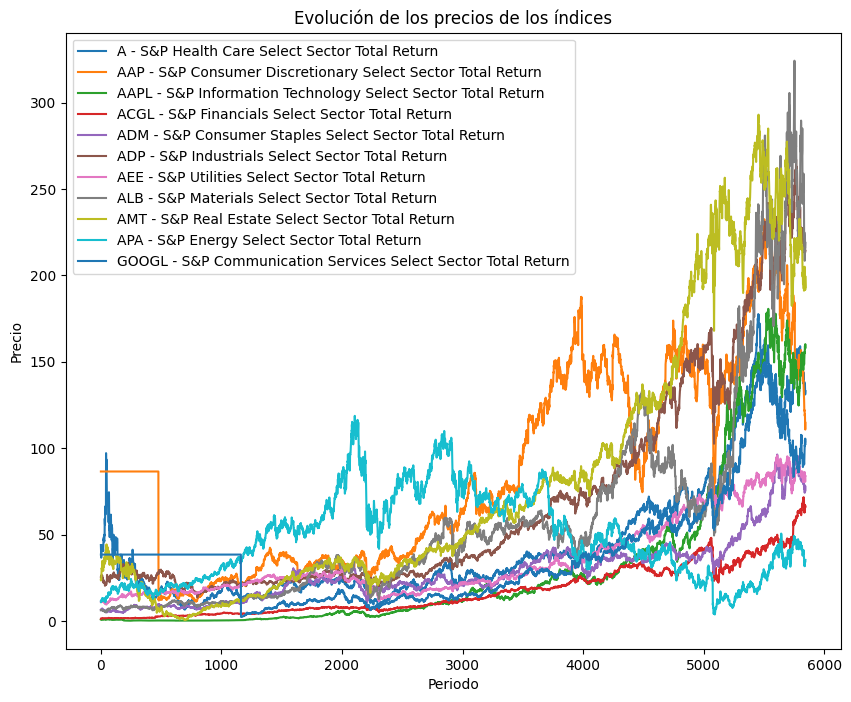

In [56]:
# Seleccionar solo la columna "Adj Close" de los índices
df_prices = df_indi["Adj Close"]

# Graficar la evolución de los precios de los índices
ax = df_prices.plot(figsize=(10, 8))

# Agregar título y etiquetas de los ejes
plt.title("Evolución de los precios de los índices")
plt.xlabel("Periodo")
plt.ylabel("Precio")

# Obtener la leyenda actual
handles, labels = ax.get_legend_handles_labels()

# Agregar las descripciones de los índices a la leyenda
for i, label in enumerate(labels):
    if label in indi_desc:
        labels[i] = "{} - {}".format(label, index_desc[label])

# Actualizar la leyenda
ax.legend(handles, labels)

# Mostrar el gráfico
plt.show()

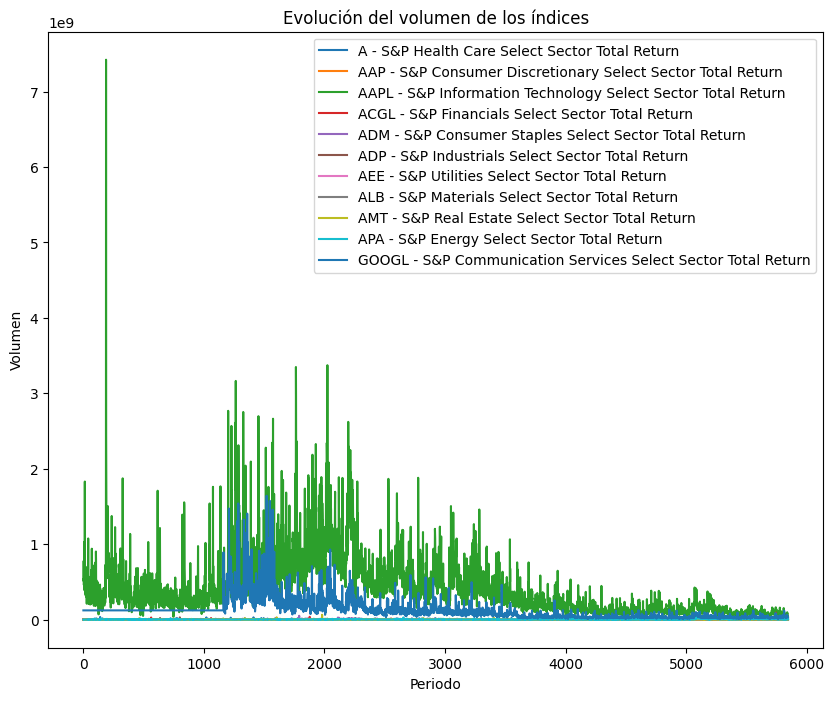

In [57]:
# Seleccionar solo la columna "Volume" de los índices
df_volume = df_indi["Volume"]

# Graficar la evolución del volumen de los índices
ax = df_volume.plot(figsize=(10, 8))

# Agregar título y etiquetas de los ejes
plt.title("Evolución del volumen de los índices")
plt.xlabel("Periodo")
plt.ylabel("Volumen")

# Obtener la leyenda actual
handles, labels = ax.get_legend_handles_labels()

# Agregar las descripciones de los índices a la leyenda
for i, label in enumerate(labels):
    if label in indi_desc:
        labels[i] = "{} - {}".format(label, indi_desc[label])

# Actualizar la leyenda
ax.legend(handles, labels)

# Mostrar el gráfico
plt.show()

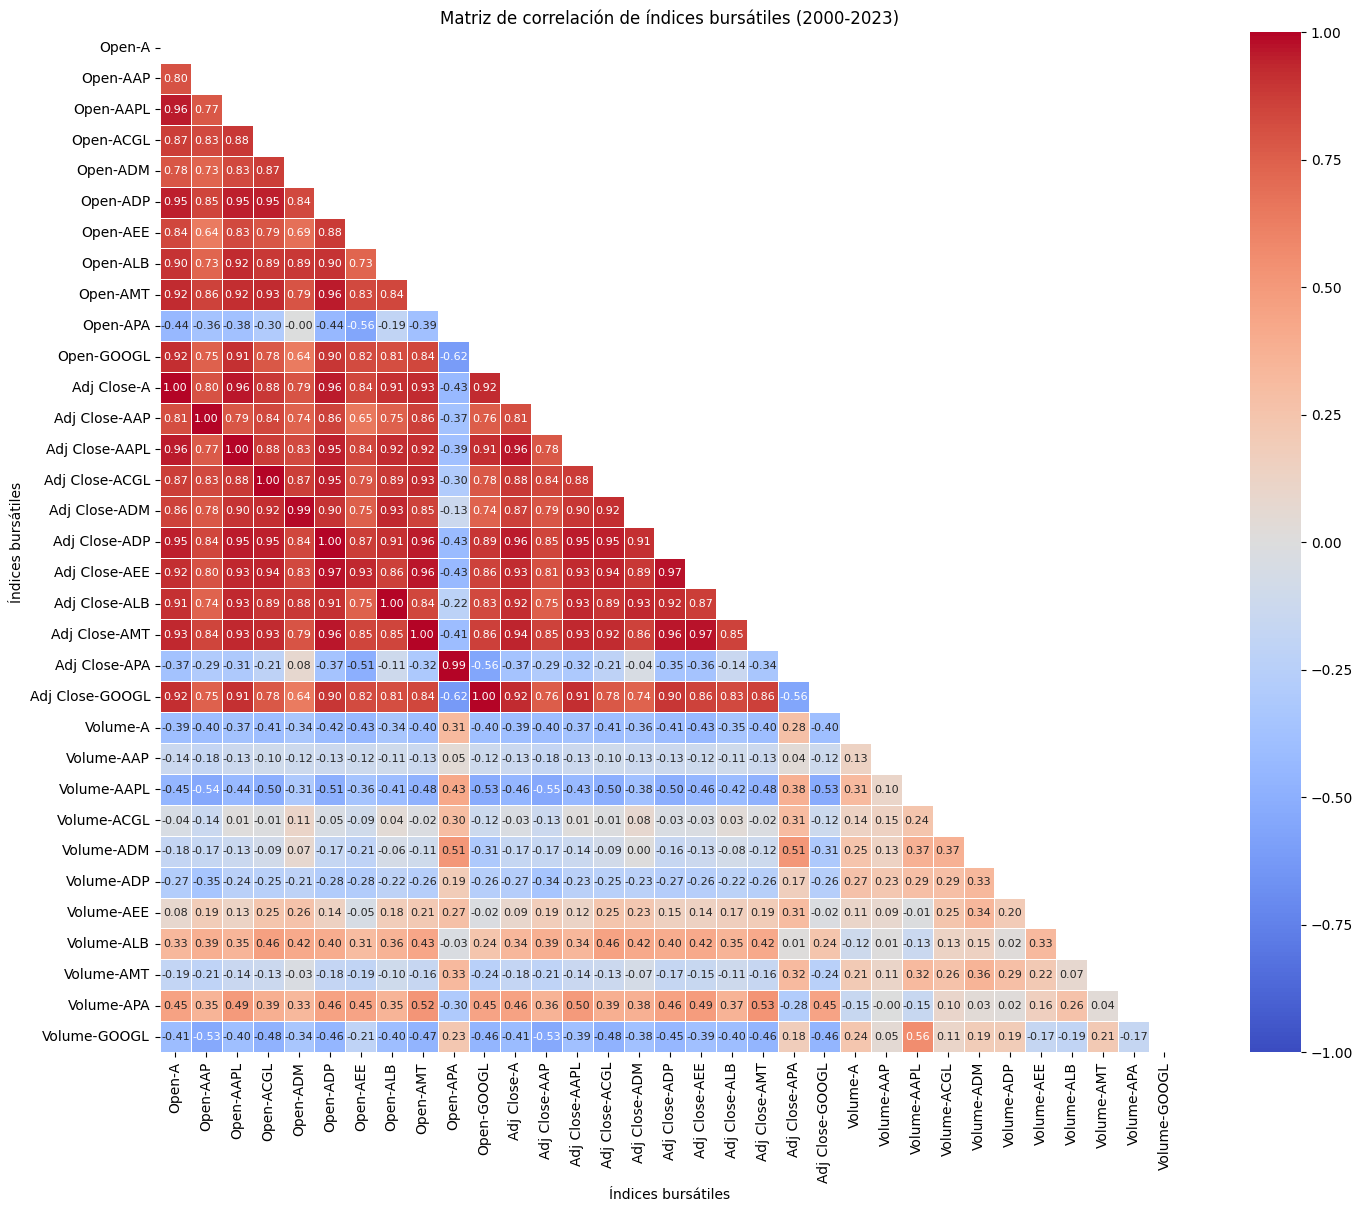

In [59]:
# Crear matriz de correlación
corr_matrix = df_indi.corr()

# Crear figura y eje
fig, ax = plt.subplots(figsize=(20, 15))

# Crear heatmap con tamaño de celda ajustado
sns.heatmap(corr_matrix, ax=ax, cmap='coolwarm', annot=True, linewidths=0.5, annot_kws={'size': 8}, square=True, cbar=True, center=0, vmin=-1, vmax=1, fmt='.2f', mask=np.triu(np.ones_like(corr_matrix)))

# Añadir título y etiquetas de eje
ax.set_title('Matriz de correlación de índices bursátiles (2000-2023)')
ax.set_xlabel('Índices bursátiles')
ax.set_ylabel('Índices bursátiles')

# Ajustar separación entre celdas
plt.subplots_adjust(left=0.2, bottom=0.2)

# Mostrar el gráfico
plt.show()

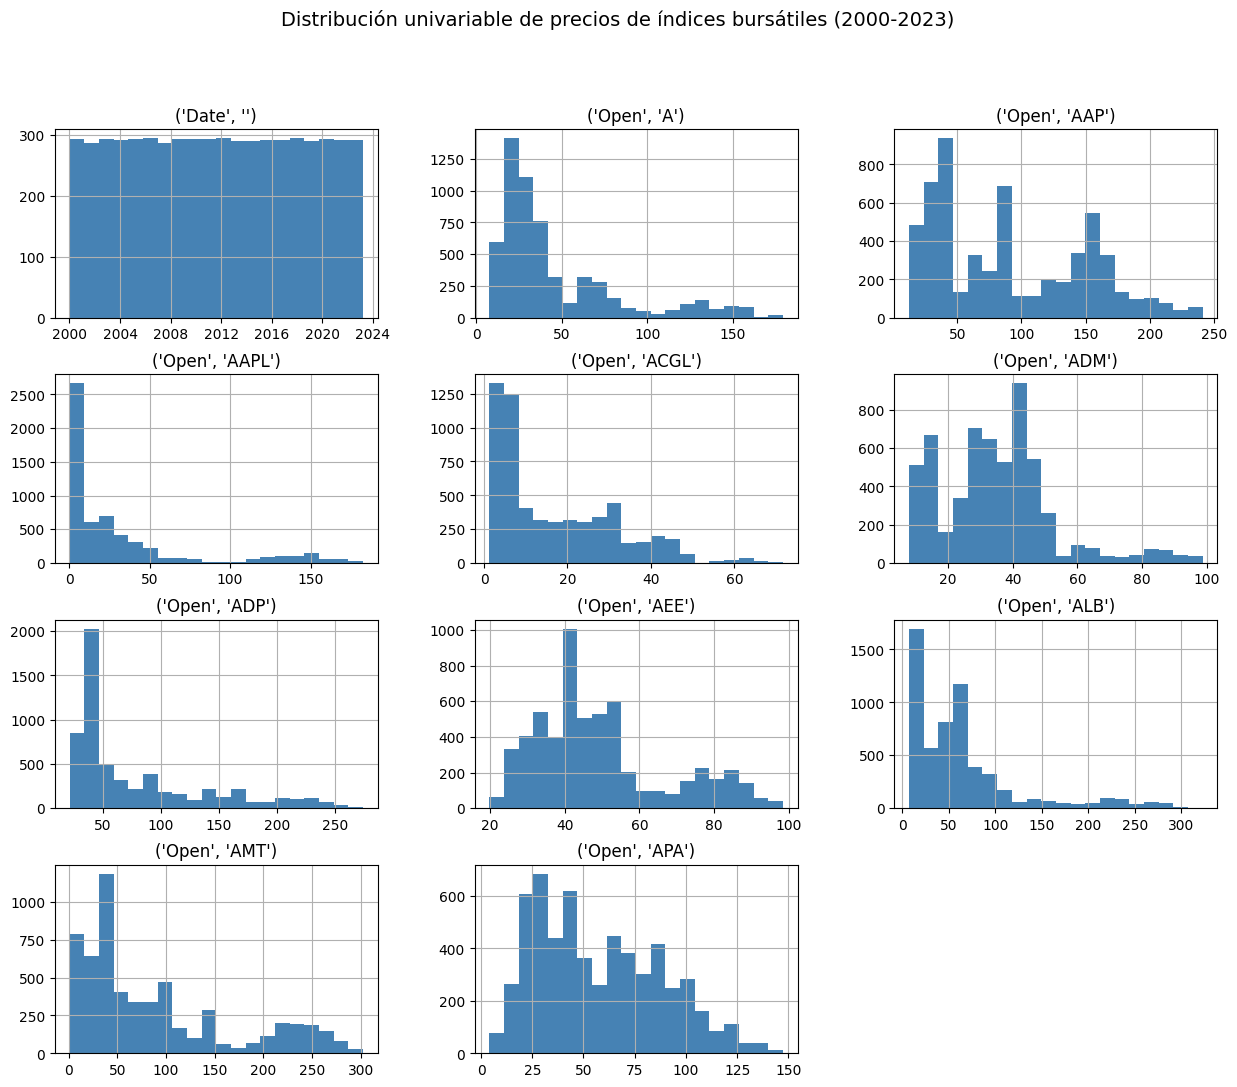

In [61]:
# Seleccionar columnas con precios de cierre de los 11 índices bursátiles
close_prices = df_indi.iloc[:, 0:11]

# Crear histogramas
close_prices.hist(bins=20, figsize=(15,12), color='steelblue')

# Añadir título y etiquetas de eje
plt.suptitle('Distribución univariable de precios de índices bursátiles (2000-2023)', fontsize=14)
plt.xlabel('Precio de cierre')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

IndexError: index 12 is out of bounds for axis 0 with size 12

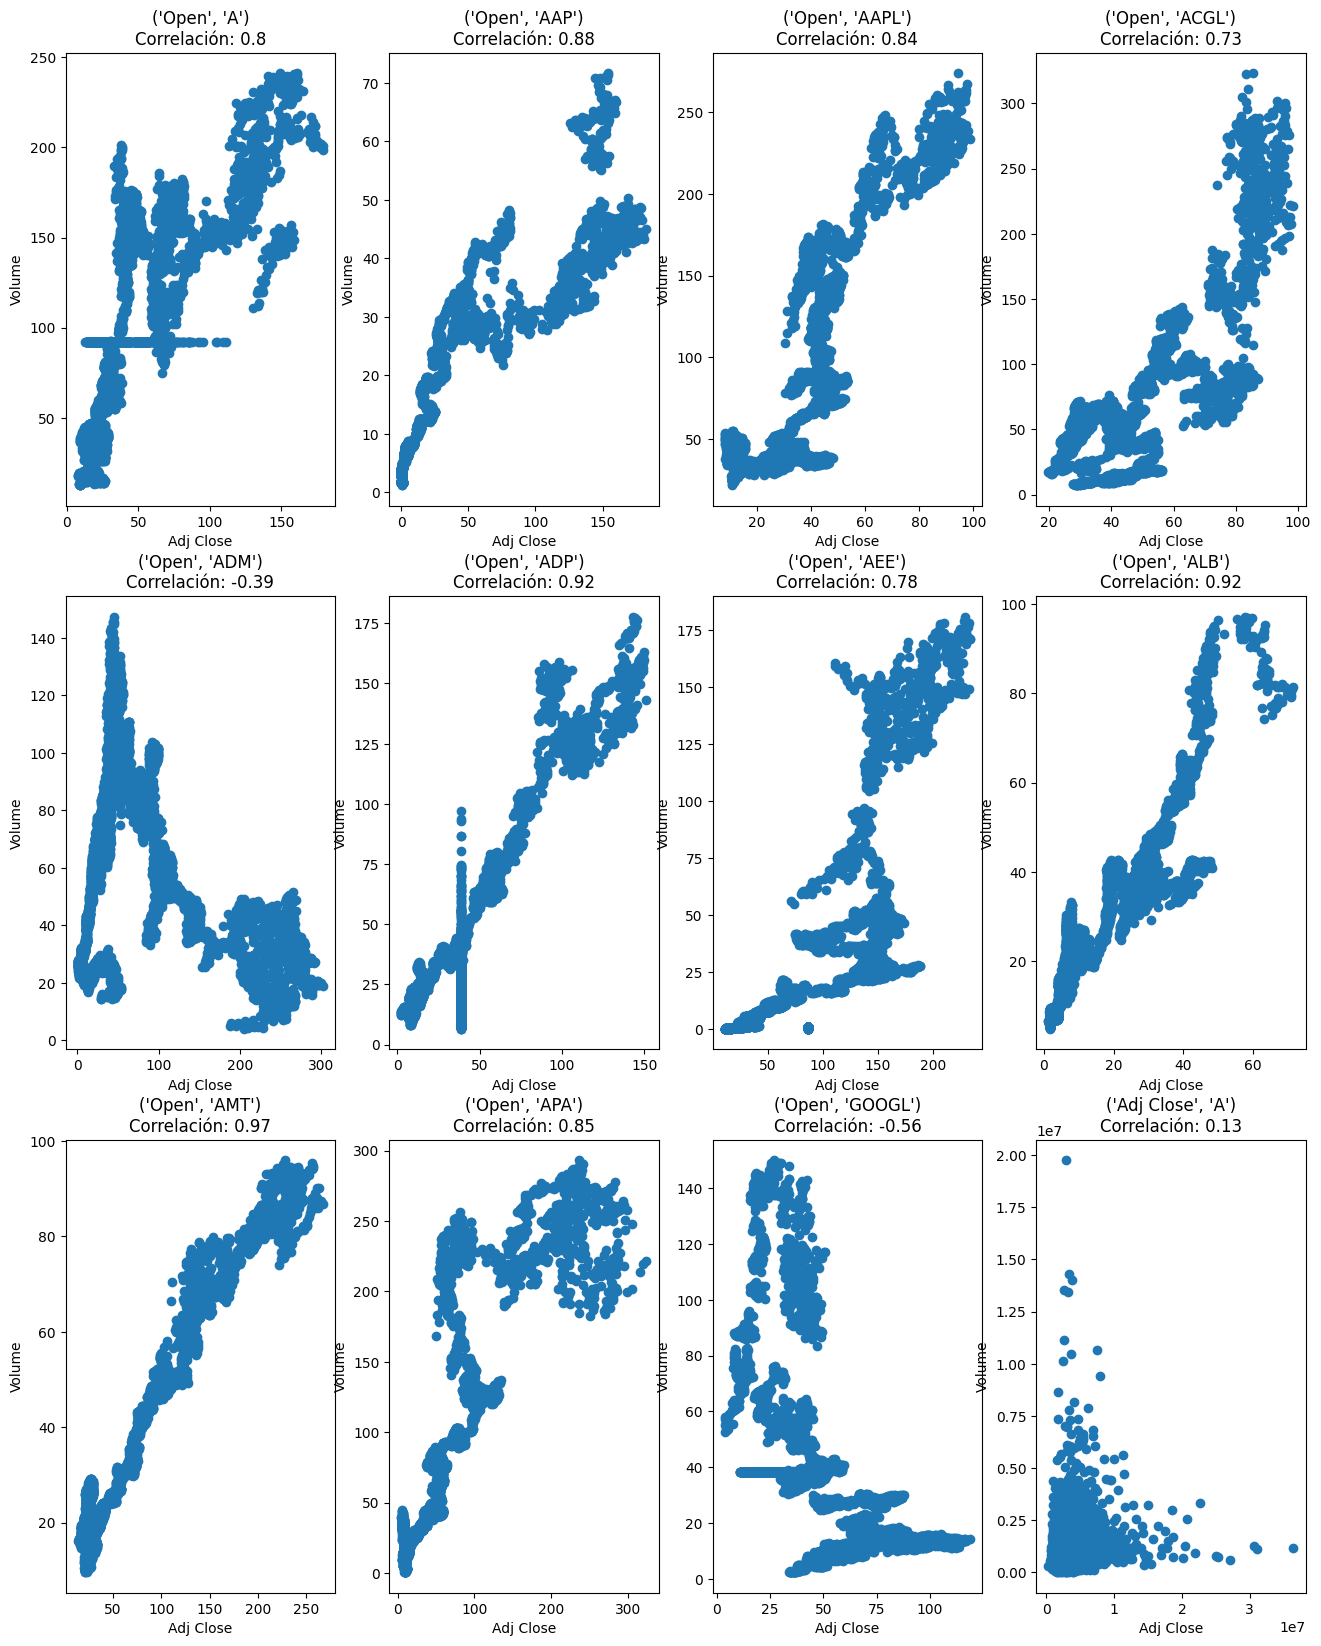

In [62]:
# Crear un gráfico de dispersión y una matriz de correlación para cada índice bursátil
fig, axs = plt.subplots(3, 4, figsize=(16, 20))
axs = axs.ravel()  # Convertir los subplots en un arreglo 1D

for i in range(len(df_indi.columns[1:])):
    index_name = df_indi.columns[i+1]
    adj_close = df_indi.iloc[:, i*2+1]
    volume = df_indi.iloc[:, i*2+2]
    corr = round(adj_close.corr(volume), 2)  # Calcular la correlación y redondear a 2 decimales
    
    axs[i].scatter(adj_close, volume)
    axs[i].set_title(f"{index_name}\nCorrelación: {corr}")
    axs[i].set_xlabel("Adj Close")
    axs[i].set_ylabel("Volume")

plt.tight_layout()
plt.show()

In [85]:
XLY = ['AMZN', 'HD', 'MCD', 'NKE', 'SBUX', 'DIS', 'LVS', 'TSLA', 'BKNG', 'GM', 'F', 'MAR', 'TGT', 'AZO', 'CMG', 'ROST', 'EBAY', 'DHI', 'WYNN', 'HBI', 'KSS', 'EXPE', 'DRI', 'MGM', 'CCL', 'NCLH', 'RCL', 'HOG', 'LKQ', 'FOXA', 'FOX', 'SYY', 'YUM', 'POOL', 'ORLY', 'ULTA', 'LULU', 'BWA', 'TPR', 'H', 'HAS', 'GPC', 'LEN']

In [86]:
# Concateno los elementos separados por espacios
indi_consu = " ".join(XLY)

In [87]:
# Traigo las empresas
df_in_consu = yf.download(indi_consu, start = start_date, end = end_date, rounding=True)

[*********************100%***********************]  43 of 43 completed


In [88]:
df_in_consu.reset_index(inplace=True)

In [89]:
# Selecciono las columnas para trabajar
df_in_consu = df_in_consu.loc[:, ["Date","Open", "Adj Close", "Volume"]]
df_in_consu.head()

Date  Open                                                      ...  \
              AMZN    AZO    BKNG   BWA    CCL CMG   DHI    DIS    DRI  ...   
0 2000-01-03  4.07  32.12  315.00  5.08  46.00 NaN  3.81  28.86  10.73  ...   
1 2000-01-04  4.27  30.50  308.25  4.87  47.50 NaN  3.68  29.59  10.32  ...   
2 2000-01-05  3.53  30.31  331.50  4.86  46.31 NaN  3.53  31.20  10.17  ...   
3 2000-01-06  3.57  29.75  368.25  4.86  47.81 NaN  3.55  32.49  10.54  ...   
4 2000-01-07  3.35  29.06  358.12  4.80  47.00 NaN  3.41  31.20  10.58  ...   

   Volume                                                                    
      RCL      ROST      SBUX      SYY      TGT TPR TSLA ULTA WYNN      YUM  
0  592200   4067200  24232000  1233200  2870400 NaN  NaN  NaN  NaN  3033493  
1  330200   7012000  21564800  1054200  3856400 NaN  NaN  NaN  NaN  3315031  
2  525300   6990400  28206400  1334200  4330600 NaN  NaN  NaN  NaN  4642602  
3  511100  24146400  30825600  1557400  8167400 NaN  NaN  NaN  NaN  3947658  
4  421900  14456000  26044800  1157400  4402600 NaN  NaN  NaN  NaN  6063647  

[5 rows x 130 columns]

In [90]:
nulos = df_in_consu.isnull().sum().sum()
print("valores nulos:", nulos)

valores nulos: 96993


In [91]:
# Calculo el valor promedio de cada columna
promedios = df_in_consu.mean()

C:\Users\WINDOWS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


In [92]:
# Reemplazo los nulos con su respectivo promedio de columna
df_in_consu.fillna(promedios, inplace=True)

In [93]:
summary = df_in_consu.describe()
print(summary)

              Open                                                      \
              AMZN          AZO         BKNG          BWA          CCL   
count  5845.000000  5845.000000  5845.000000  5845.000000  5845.000000   
mean     34.931802   514.949466   818.491990    28.711680    38.008547   
std      49.594624   569.410656   817.846566    16.864563    13.720844   
min       0.300000    21.190000     6.600000     3.790000     6.420000   
25%       2.210000    92.800000    39.700000    13.160000    27.750000   
50%       9.460000   297.690000   509.990000    32.200000    37.870000   
75%      47.940000   742.140000  1641.520000    41.670000    47.940000   
max     187.200000  2609.290000  2680.000000    66.790000    71.930000   

                                                                        ...  \
               CMG          DHI          DIS          DRI         EBAY  ...   
count  5845.000000  5845.000000  5845.000000  5845.000000  5845.000000  ...   
mean    537.113140    

In [94]:
df_in_consu.to_csv('df_in_consu.csv', index=False)

In [95]:
XLV = ['JNJ', 'UNH', 'PFE', 'MRK', 'TMO', 'ABBV', 'BMY', 'ABT', 'AMGN', 'MDT', 'LLY', 'CVS', 'ISRG', 'GILD', 'CI', 'VRTX', 'DGX', 'HUM', 'REGN', 'BDX', 'A', 'ZBH', 'IDXX', 'MTD', 'HSIC', 'DXCM', 'WBA', 'STE', 'IQV', 'ALGN', 'SYK', 'BIIB', 'XRAY', 'BAX', 'PKI', 'MCK', 'HCA', 'TFX', 'RMD', 'CNC']

In [96]:
indi_health_c = " ".join(XLV)

In [97]:
df_in_health_c = yf.download(indi_health_c, start = start_date, end = end_date, rounding=True)

[*********************100%***********************]  40 of 40 completed


In [98]:
df_in_health_c.reset_index(inplace=True)

In [100]:
df_in_health_c = df_in_health_c.loc[:, ["Date", "Adj Close", "Volume"]]
df_in_health_c.head()

Date Adj Close                                                     \
                     A ABBV   ABT ALGN   AMGN    BAX    BDX   BIIB    BMY   
0 2000-01-03     44.00  NaN  9.22  NaN  46.77  10.64  17.87  31.08  26.56   
1 2000-01-04     40.64  NaN  8.96  NaN  43.19  10.40  17.40  28.98  24.55   
2 2000-01-05     38.12  NaN  8.94  NaN  44.68  10.86  17.53  31.00  24.39   
3 2000-01-06     36.67  NaN  9.25  NaN  45.42  11.08  18.25  32.38  24.73   
4 2000-01-07     39.72  NaN  9.35  NaN  50.53  11.71  19.27  36.10  28.35   

   ...   Volume                                                               \
   ...      RMD     STE      SYK     TFX     TMO       UNH     VRTX      WBA   
0  ...   770400  383100  1078000  172200  432200   3431200  1010000  2095900   
1  ...   620800  321700  1140800  138700  568400   5997600   265400  1709100   
2  ...   845600  327600  1239200  167400  490800  10562400   202000  2167800   
3  ...   265600  663900  1438400  240400  561900  15300000   270600  2595400   
4  ...  1012800  313000  3115200  161100  266600  16160800   813200  3629900   

                
      XRAY ZBH  
0   582300 NaN  
1   317700 NaN  
2  1188000 NaN  
3   534300 NaN  
4  1401000 NaN  

[5 rows x 81 columns]

In [102]:
nulos = df_in_health_c.isnull().sum().sum()
print("valores nulos:", nulos)

valores nulos: 24064


In [103]:
# Calculo el valor promedio de cada columna
promedios = df_in_health_c.mean()

# Reemplazo los nulos con su respectivo promedio de columna
df_in_health_c.fillna(promedios, inplace=True)

C:\Users\WINDOWS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


In [104]:
df_in_health_c.to_csv('df_in_health_c.csv', index=False)

In [105]:
XLK = ['AAPL', 'MSFT', 'NVDA', 'V', 'MA', 'INTC', 'CSCO', 'ADBE', 'CRM', 'ORCL', 'AVGO', 'ACN', 'IBM', 'TXN', 'QCOM', 'NOW', 'MU', 'FIS', 'ADI', 'AMD', 'ADI', 'INTU', 'ADSK', 'LRCX', 'AMAT', 'TEL', 'APH', 'CTSH', 'SNPS', 'ANSS', 'FLT', 'HPQ', 'MSCI', 'CDNS', 'GPN', 'KEYS', 'PAYC', 'FTNT', 'SWKS', 'MCHP', 'VRSN']

In [106]:
# Concateno los elementos separados por espacios
indi_info_tech = " ".join(XLK)

In [107]:
df_in_info_tech = yf.download(indi_info_tech, start = start_date, end = end_date, rounding=True)

[*********************100%***********************]  40 of 40 completed


In [108]:
df_in_info_tech.reset_index(inplace=True)

In [110]:
# Selecciono las columnas para trabajar
df_in_info_tech = df_in_info_tech.loc[:, ["Date", "Open", "Adj Close", "Volume"]]
df_in_info_tech.head()

Date  Open                                                    ...  \
              AAPL ACN   ADBE    ADI  ADSK   AMAT    AMD  ANSS   APH  ...   
0 2000-01-03  0.94 NaN  16.81  46.75  8.50  32.09  14.97  2.72  2.11  ...   
1 2000-01-04  0.97 NaN  15.75  44.75  8.05  30.44  15.12  2.81  2.09  ...   
2 2000-01-05  0.93 NaN  14.56  42.81  7.75  29.52  14.53  2.68  2.02  ...   
3 2000-01-06  0.95 NaN  15.36  43.44  7.38  28.56  15.50  2.69  1.98  ...   
4 2000-01-07  0.86 NaN  15.39  42.00  7.02  28.19  15.41  2.59  1.94  ...   

     Volume                                                               \
       NVDA       ORCL PAYC      QCOM     SNPS    SWKS TEL       TXN   V   
0  30091200   98114800  NaN  91334000  2315600  512000 NaN  10815600 NaN   
1  30048000  116824800  NaN  63567400  1291000  292600 NaN   7952400 NaN   
2  18835200  166054000  NaN  93778400  3343800  411800 NaN  12142400 NaN   
3  12048000  109880000  NaN  58782600  3107400  385400 NaN  11758400 NaN   
4   7118400   91755600  NaN  68198600  1710800  536000 NaN  12938800 NaN   

            
      VRSN  
0  2270100  
1  3002200  
2  6886600  
3  4003200  
4  3803200  

[5 rows x 121 columns]

In [111]:
nulos = df_in_info_tech.isnull().sum().sum()
print("valores nulos:", nulos)

valores nulos: 83310


In [112]:
# Calculo el valor promedio de cada columna
promedios = df_in_info_tech.mean()

# Reemplazo los nulos con su respectivo promedio de columna
df_in_info_tech.fillna(promedios, inplace=True)

C:\Users\WINDOWS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


In [113]:
df_in_info_tech.to_csv('df_in_info_tech.csv', index=False)

In [117]:
suma = df_in_info_tech['Open'].apply(lambda x: x.get('AAPL', 0)).sum()
suma

0

In [123]:
df = pd.DataFrame({
    'date': ['2022-01-01', '2022-01-02', '2022-01-03'],
    'open': [{'AAPL': 35.40, 'GOOGL': 12.34, 'AAP': 56.78, 'APA': 23.45, 'A': 34.56},
             {'AAPL': 67.89, 'GOOGL': 23.45, 'AAP': 34.56, 'APA': 45.67, 'A': 56.78},
             {'AAPL': 45.30, 'GOOGL': 34.56, 'AAP': 67.89, 'APA': 56.78, 'A': 67.89}],
    'close':[36.50, 68.90, 45.67],
    'volumen': [1000, 2000, 3000]})

In [119]:
df

,date,open,close,volumen
0,2022-01-01,"{'AAPL': 35.4, 'GOOGL': 12.34, 'AAP': 56.78, '...",36.50,1000
1,2022-01-02,"{'AAPL': 67.89, 'GOOGL': 23.45, 'AAP': 34.56, ...",68.90,2000
2,2022-01-03,"{'AAPL': 45.3, 'GOOGL': 34.56, 'AAP': 67.89, '...",45.67,3000
